/home/harsh/Hackathons/Convolve/venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:54:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AUC-ROC Score: 0.8435897739857194

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87     19088
           1       0.05      0.75      0.09       274

    accuracy                           0.78     19362
   macro avg       0.52      0.76      0.48     19362
weighted avg       0.98      0.78      0.86     19362



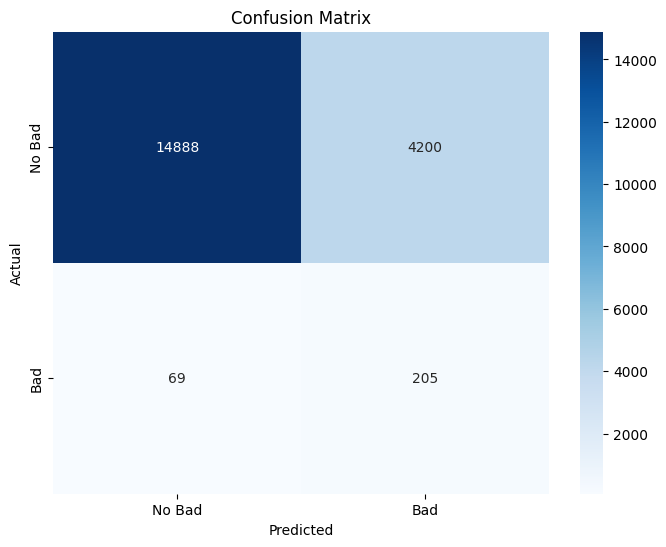

['best_xgb_model.joblib']

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from joblib import dump


# Load the processed development dataset
dev_data_path = "/home/harsh/Hackathons/Convolve/data/dev/Dev_data_to_be_shared.csv"
data = pd.read_csv(dev_data_path)

# Split data into features and target
X = data.drop(columns=["bad_flag", "account_number"])  # Exclude target and primary key
y = data["bad_flag"]

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using XGBoost's built-in scale_pos_weight
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the best parameters
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1, 
    'max_depth': 3,
    'n_estimators': 100,
    'reg_alpha': 0,
    'reg_lambda': 10,
    'subsample': 1.0
}

# Train the model using the best parameters
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42,
    **best_params
)
model.fit(X_train, y_train)

# Predict probabilities and labels on the validation set
y_val_pred_prob = model.predict_proba(X_val)[:, 1]
y_val_pred = model.predict(X_val)

# Evaluate the model performance
auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"AUC-ROC Score: {auc}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Bad", "Bad"], yticklabels=["No Bad", "Bad"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the trained model
dump(model, "best_xgb_model.joblib")


In [5]:
import xgboost as xgb

Validation AUC-ROC: 0.8435897739857194
              precision    recall  f1-score   support

           0       1.00      0.78      0.87     19088
           1       0.05      0.75      0.09       274

    accuracy                           0.78     19362
   macro avg       0.52      0.76      0.48     19362
weighted avg       0.98      0.78      0.86     19362



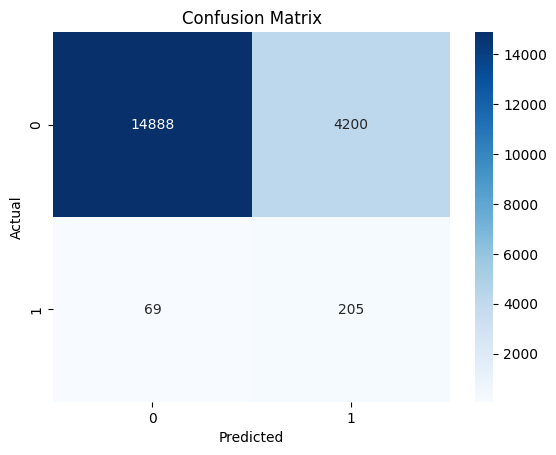

<Figure size 10000x80000 with 0 Axes>

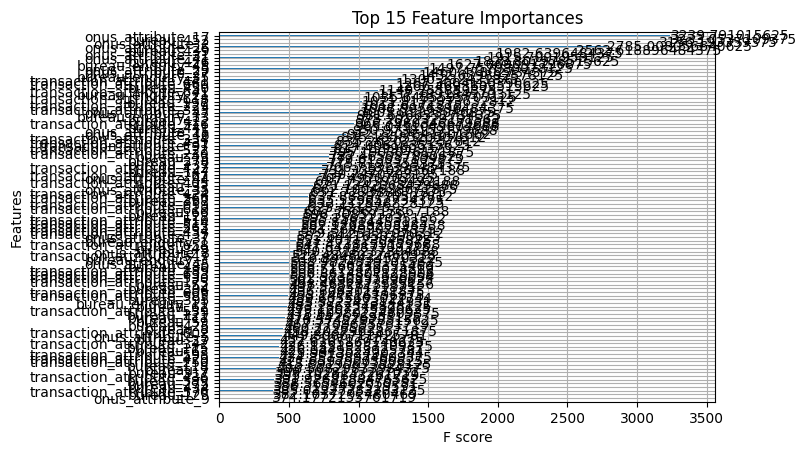

In [10]:
# Evaluate on validation set
y_val_pred_prob = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"Validation AUC-ROC: {roc_auc}")

# Generate classification report and confusion matrix
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
print(classification_report(y_val, y_val_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature importance
plt.figure(figsize=(100, 800))
xgb.plot_importance(model, max_num_features=100, importance_type="gain")
plt.title("Top 15 Feature Importances")
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import plot_importance

feature_importances = model.get_booster().get_score(importance_type="gain")
feature_importance_df = pd.DataFrame({
    "Feature": list(feature_importances.keys()),
    "Importance": list(feature_importances.values())
}).sort_values(by="Importance", ascending=False)



In [18]:
feature_importance_df.to_csv("imp_feature.csv",index=False)

In [ ]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from pycaret.classification import setup, compare_models, pull, save_model , predict_model

# # Load the processed development dataset
# dev_data_path = "/home/harsh/Hackathons/Convolve/data/dev"
# data = pd.read_csv(dev_data_path)

# # Quick overview of the dataset
# print("Dataset Overview:")
# print(data.info())

# # Correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
# plt.title("Correlation Matrix")
# plt.show()

# # Describe dataset for basic stats
# stats = data.describe().T
# print("Dataset Statistics:")
# print(stats)

# # PyCaret Setup
# # Define target and ignore primary key
# clf_setup = setup(
#     data=data,
#     target="bad_flag",
#     ignore_features=["account_number"],  # Primary key column
#     session_id=42,  # Ensure reproducibility
#     silent=True,
#     normalize=True,  # Normalize numerical features
#     feature_selection=True,  # Enable feature selection
#     fix_imbalance=True,  # Handle class imbalance
#     remove_multicollinearity=True,  # Remove correlated features
#     multicollinearity_threshold=0.9,  # Threshold for multicollinearity
#     use_gpu=True  # Use GPU for faster computation
# )

# # Compare models and select the best
# print("Training models and comparing performance...")
# best_model = compare_models()

# # Retrieve and display all model performance metrics
# model_performance = pull()
# print("Model Performance Metrics:")
# print(model_performance)

# # Save the best model
# save_model(best_model, "/home/harsh/Hackathons/Convolve/models")
# print("Best model saved!")

# # Feature Importance
# from pycaret.utils import check_metric

# # Evaluate the best model on unseen data (optional)
# print("Evaluating the best model...")
# predictions = predict_model(best_model)
# print(predictions.head())

# # Feature importance plot
# plt.figure(figsize=(10, 8))
# feature_importance = best_model.feature_importances_  # Best model feature importance
# sns.barplot(x=feature_importance, y=data.drop(columns=["bad_flag", "account_number"]).columns)
# plt.title("Feature Importance")
# plt.xlabel("Importance Score")
# plt.ylabel("Feature")
# plt.show()

# # Save predictions for validation
# predictions["account_number"] = data["account_number"]  # Add back primary key
# predictions.to_csv("../outputs/predictions/validation_predictions.csv", index=False)
# print("Predictions saved!")


RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=7, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')